#  Image   calssification using tensorflow 2.0 and keras 

**Importing important  libraries**





In [0]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**Steps of convolutional neural networks:**

**Convolution Operation ----> Pooling ------> Flattening -----> Full Connection**
              

![alt text](https://raw.githubusercontent.com/sujitkoley9/Image-Classification/master/CNN-1.jpg)


![alt text](https://raw.githubusercontent.com/sujitkoley9/Image-Classification/master/CNN-2.png)

**Step 1 - Convolution**



In [0]:
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

**Step 2 - Pooling**

In [0]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

**Step 3 -Adding a second convolutional layer**

In [0]:
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

**Step 4 - Flattening**

In [0]:
classifier.add(Flatten())

**Step 5 - Full connection**

In [0]:
classifier.add(Dense(128, activation = 'relu'))
classifier.add(Dense(1, activation = 'sigmoid'))

**Step 6 -Compiling the CNN**

**Different type of optimizers are:**


1.   sgd (stochastic gradient descent)
2.   rmsprop (root mean square propagation) 

1.   Adams
2.   Adagrad

1.   Adadelta


















```



In [0]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


**Step 7: Image augmentation**

***Explanation:***
batch_size=32 means  -- per step 32 images will be generated randomly


In [20]:
# Batch size
batch_size=32

# To handle image loading problem
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('training_set',
                                                 target_size = (64, 64),
                                                 batch_size = batch_size,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('test_set',
                                            target_size = (64, 64),
                                            batch_size = batch_size,
                                            class_mode = 'binary')

print(training_set.class_indices)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
{'cats': 0, 'dogs': 1}


**Step 8 - Fitting the CNN to the images**

***Explanation:***
Epochs = 64 and steps_per_epoch=100 means ---we want to go over our training data 64 times and each time we will make gradient updates 100 times with different data.





In [24]:
history = classifier.fit_generator(training_set,
                         steps_per_epoch = len(training_set),
                         epochs = 20,
                         validation_data = test_set,
                         validation_steps = len(test_set))

Epoch 1/20
250/250 [==============================] - 70s 279ms/step - loss: 0.4420 - accuracy: 0.7955 - val_loss: 0.4738 - val_accuracy: 0.7940
Epoch 2/20
250/250 [==============================] - 69s 274ms/step - loss: 0.4324 - accuracy: 0.7947 - val_loss: 0.4612 - val_accuracy: 0.7930
Epoch 3/20
250/250 [==============================] - 69s 277ms/step - loss: 0.4152 - accuracy: 0.8056 - val_loss: 0.5114 - val_accuracy: 0.7655
Epoch 4/20
250/250 [==============================] - 69s 278ms/step - loss: 0.4070 - accuracy: 0.8149 - val_loss: 0.4455 - val_accuracy: 0.7895
Epoch 5/20
250/250 [==============================] - 69s 276ms/step - loss: 0.3954 - accuracy: 0.8144 - val_loss: 0.5060 - val_accuracy: 0.7755
Epoch 6/20
250/250 [==============================] - 68s 273ms/step - loss: 0.3738 - accuracy: 0.8300 - val_loss: 0.4868 - val_accuracy: 0.7945
Epoch 7/20
250/250 [==============================] - 69s 276ms/step - loss: 0.3734 - accuracy: 0.8364 - val_loss: 0.4831 - val_ac

**Visual display of accuaracy and loss of model**

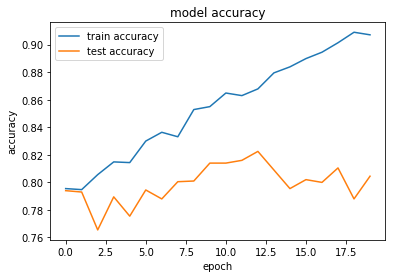

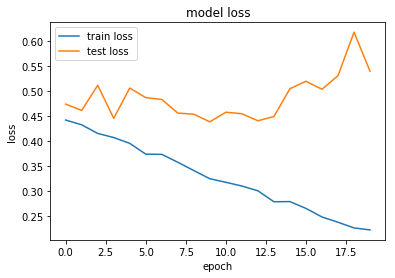

In [54]:
# summarize history for accuracy
epoch = range(len(history.history['accuracy']))
plt.plot(epoch,history.history['accuracy'],label="train accuracy")
plt.plot(epoch,history.history['val_accuracy'],label="test accuracy")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()
# summarize history for loss
plt.plot(epoch,history.history['loss'],label="train loss")
plt.plot(epoch,history.history['val_loss'],label="test loss" )
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

  **Prediction on unknown image**

In [0]:

test_image_1 = image.load_img('single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image_2 = image.load_img('single_prediction/cat_or_dog_2.jpg', target_size = (64, 64))

test_image_1 = image.img_to_array(test_image_1)
test_image_2 = image.img_to_array(test_image_2)

test_image_1 = np.expand_dims(test_image_1, axis = 0)
test_image_2 = np.expand_dims(test_image_2, axis = 0)

result_1 = classifier.predict(test_image_1)
result_2 = classifier.predict(test_image_2 )


prediction_1 = "dog"  if result_1[0][0] == 1 else "cat"

prediction_2 = "dog"  if result_2[0][0] == 1 else "cat"


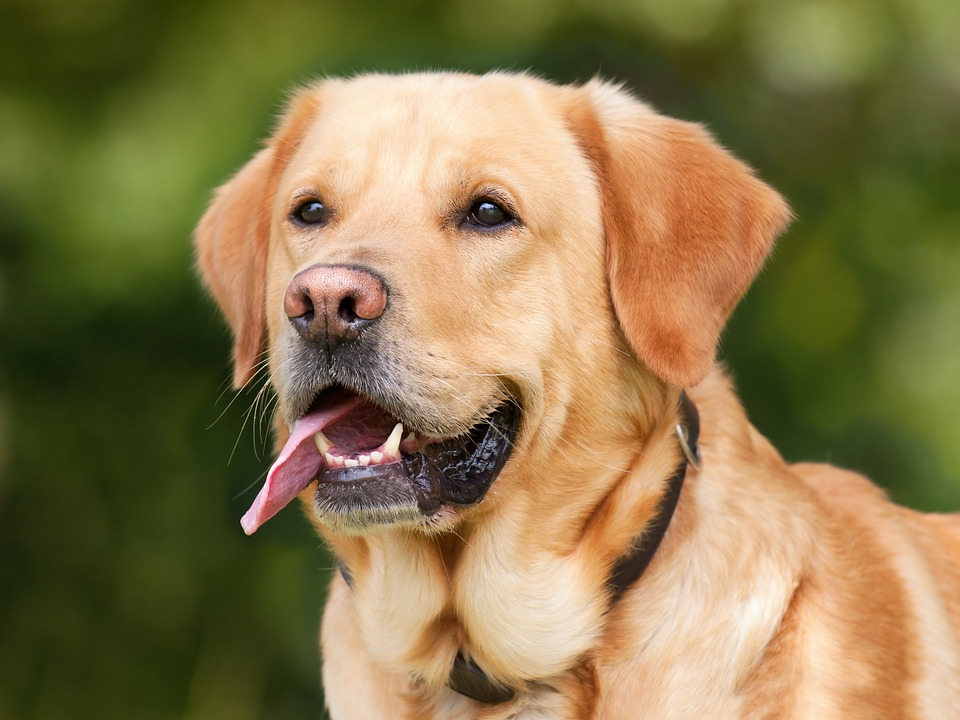

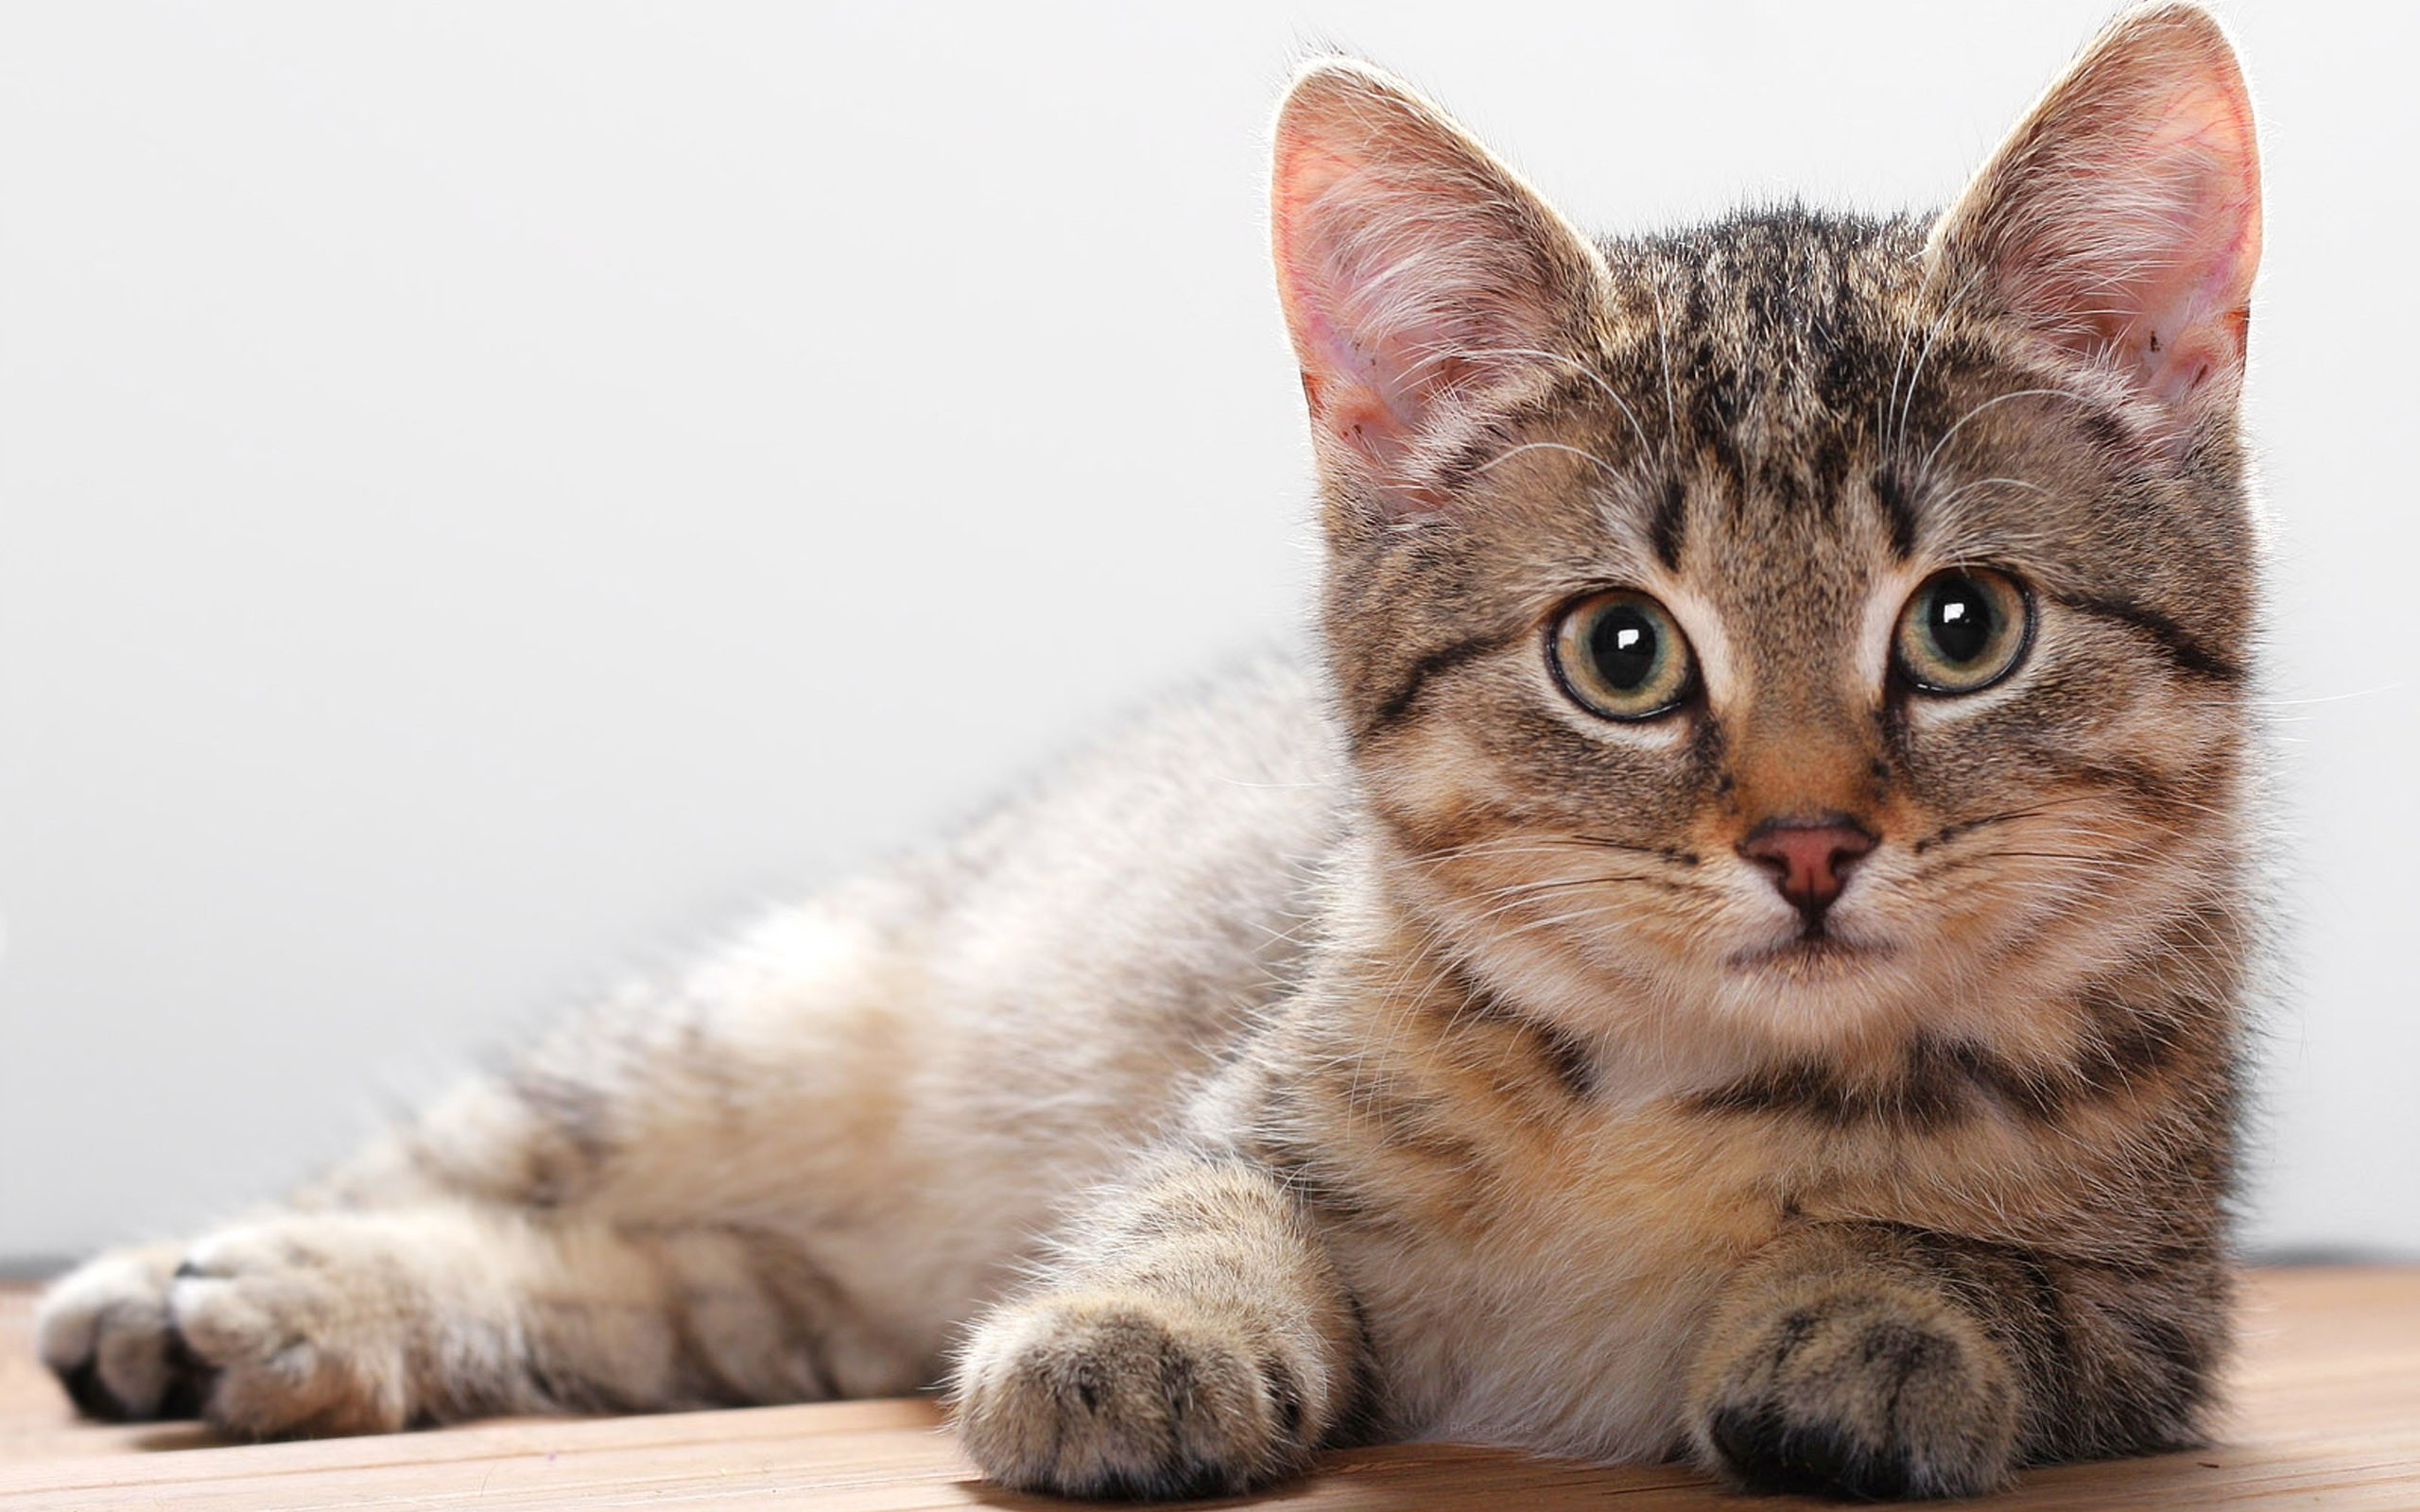

In [57]:
from IPython.display import Image,display,HTML

display(HTML('<h1> it is  ' +prediction_1 +  ' </h1>'))
display(Image(filename='single_prediction/cat_or_dog_1.jpg',width=800, height=400))

display(HTML('<h1> it is  ' +prediction_2 +  ' </h1>'))
display(Image(filename='single_prediction/cat_or_dog_2.jpg',width=800, height=400))

